# Linear Regression

Name: Parshva Bhadra<br>
Roll Number: 2020101001

## Background about the dataset

TLDR: You have 4 independent variables (`float`) for each molecule. You can use a linear combination of these 4 independent variables to predict the bandgap (dependent variable) of each molecule.

You can read more about the problem in [Li et al, Bandgap tuning strategy by cations and halide ions of lead halide perovskites learned from machine learning, RSC Adv., 2021,11, 15688-15694](https://doi.org/10.1039/D1RA03117A).

In [17]:
import csv
import random
import numpy as np

In [18]:
all_molecules = list()

with open('bg_data.txt', 'r') as infile:
    input_rows = csv.DictReader(infile)
    
    for row in input_rows:
        current_mol = ([float(row['Cs']), float(row['FA']), float(row['Cl']), float(row['Br'])], float(row['Bandgap']))
        all_molecules.append(current_mol)

random.shuffle(all_molecules)


num_train = int(len(all_molecules) * 0.8)

# each point in x_train has 4 values - 1 for each feature
x_train = [x[0] for x in all_molecules[:num_train]]
# each point in y_train has 1 value - the bandgap of the molecule
y_train = [x[1] for x in all_molecules[:num_train]]

x_test = [x[0] for x in all_molecules[num_train:]]
y_test = [x[1] for x in all_molecules[num_train:]]

### 4.1 Implement a Linear Regression model that minimizes the MSE **without using any libraries**. You may use NumPy to vectorize your code, but *do not use numpy.polyfit* or anything similar.

4.1.1 Explain how you plan to implement Linear Regression in 5-10 lines.

<!-- your answer to 1.1.1 -->
Answer: 

First of all, the purpose is to find a hyperplane that will best fit the data. I will take a random initial hyperplane. I will use the formula for the mean squared error to find the error. Iwill minimise the error to find the required hyperplane. I will use the formula for the gradient descent algorithm to find the optimal values of the parameters of the hyperplane. I will use the formula for the partial derivative of the mean squared error with respect to the parameters to find the gradient.

4.1.2 Implement Linear Regression using `x_train` and `y_train` as the train dataset.

4.1.2.1 Choose the best learning rate and print the learning rate for which you achieved the best MSE.

In [19]:
# convert x_train and x_test to numpy arrays
x_train = np.array(x_train)
x_test = np.array(x_test)

# implement Linear Regression
class LinearRegression:
    def __init__(self, lr=0.01, num_iter=1000):
        self.lr = lr
        self.num_iter = num_iter
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):   
        # init parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # gradient descent
        for _ in range(self.num_iter):
            y_predicted = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
    
    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted

    def MSE(self, y, y_predicted):
        return np.mean((y - y_predicted)**2)

# create an array for learning rates
learning_rates = np.array([0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1])

# create a LinearRegression object and find the best learning rate
best_lr = 0
min_MSE = 0
for i in range(len(learning_rates)):
    regressor = LinearRegression(learning_rates[i])
    regressor.fit(x_train, y_train)
    y_predicted = regressor.predict(x_test)
    MSE = regressor.MSE(y_test, y_predicted)
    if (best_lr == 0):
        best_lr = learning_rates[i]
        min_MSE = MSE
    elif (MSE < min_MSE):
        best_lr = learning_rates[i]
        min_MSE = MSE
    
print("Best learning rate: ", best_lr)
regressor = LinearRegression(best_lr)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

Best learning rate:  1.0


4.1.3 Make a [Parity Plot](https://en.wikipedia.org/wiki/Parity_plot) of your model's bandgap predictions on the test set with the actual values.

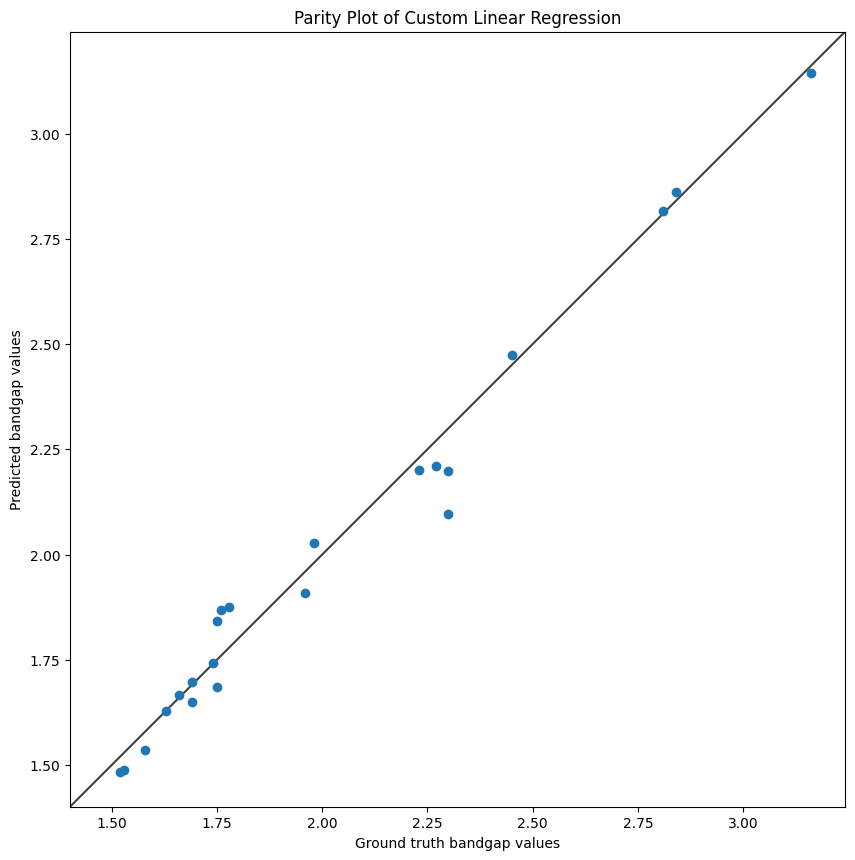

In [20]:
# Get the predictions of x_test into `y_pred`

#
# ...
#

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,20))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth bandgap values')
ax.set_ylabel('Predicted bandgap values')
plt.show()

### 4.2 Implement Ridge regression
4.2.1 Explain Ridge regression briefly in 1-2 lines.

<!-- Your answer to 1.2.1 -->
Answer:

Ridge regression is a method of linear regression that uses a penalty term to reduce the complexity of the model. It is used to reduce the variance of the model. It is used to prevent overfitting. It is used to reduce the effect of multicollinearity. The penalty term is the sum of the squares of the coefficients.

4.2.2 Implement Ridge regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total. (You can use scikit-learn from this cell onwards)

Answer:

Alpha (α) is the penalty term that denotes the amount of shrinkage (or constraint) that will be implemented in the equation. With alpha set to zero, you will find that this is the equivalent of the linear regression model, and a larger value penalizes the optimization function. Therefore, ridge regression shrinks the coefficients and helps to reduce the model complexity and multi-collinearity. Alpha (α) can be any real-valued number between zero and infinity; the larger the value, the more aggressive the penalization is.

In [26]:
# you should not have imported sklearn before this point
import sklearn
from sklearn.linear_model import Ridge
import pandas as pd

# implement Ridge regression and make a table where you explore the effect of different values of `alpha`
def MSE(y, y_predicted):
    return np.mean((y - y_predicted)**2)

alpha_array = np.array([0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000])
MSE_array = np.zeros(len(alpha_array))

for i in range(len(alpha_array)):
    regressor = Ridge(alpha=alpha_array[i])
    regressor.fit(x_train, y_train)
    y_predicted = regressor.predict(x_test)
    MSE_array[i] = MSE(y_test, y_predicted)

df = pd.DataFrame({'Alpha': alpha_array, 'MSE': MSE_array})
print(df)

       Alpha       MSE
0      0.001  0.004673
1      0.003  0.004678
2      0.010  0.004693
3      0.030  0.004740
4      0.100  0.004941
5      0.300  0.005774
6      1.000  0.010620
7      3.000  0.028754
8     10.000  0.076025
9     30.000  0.132877
10   100.000  0.180850
11   300.000  0.202215
12  1000.000  0.211023


### 4.3 Implement Lasso regression
4.3.1 Explain Lasso regression briefly in 1-2 lines.

Answer:

Lasso regression is a method of linear regression that uses a penalty term to reduce the complexity of the model. It is used to reduce the variance of the model. It is used to prevent overfitting. It is used to reduce the effect of multicollinearity. It is used to select the most important features. The penalty term is the absolute value of the magnitude of the coefficients.

4.3.2 Implement Lasso regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total.

Answer:

Alpha (α) is the penalty term that denotes the amount of shrinkage (or constraint) that will be implemented in the equation. With alpha set to zero, you will find that this is the equivalent of the linear regression model, and a larger value penalizes the optimization function. Therefore, ridge regression shrinks the coefficients and helps to reduce the model complexity and multi-collinearity. Alpha (α) can be any real-valued number between zero and infinity; the larger the value, the more aggressive the penalization is.

In [25]:
# implement Lasso regression and make a table where you explore the effect of different values of `alpha`
import sklearn
from sklearn.linear_model import Lasso
import pandas as pd

# implement Ridge regression and make a table where you explore the effect of different values of `alpha`
def MSE(y, y_predicted):
    return np.mean((y - y_predicted)**2)

alpha_array = np.array([0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000])
MSE_array = np.zeros(len(alpha_array))

for i in range(len(alpha_array)):
    regressor = Lasso(alpha=alpha_array[i])
    regressor.fit(x_train, y_train)
    y_predicted = regressor.predict(x_test)
    MSE_array[i] = MSE(y_test, y_predicted)

df = pd.DataFrame({'Alpha': alpha_array, 'MSE': MSE_array})
print(df)

       Alpha       MSE
0      0.001  0.004760
1      0.003  0.005228
2      0.010  0.009034
3      0.030  0.037551
4      0.100  0.215053
5      0.300  0.215053
6      1.000  0.215053
7      3.000  0.215053
8     10.000  0.215053
9     30.000  0.215053
10   100.000  0.215053
11   300.000  0.215053
12  1000.000  0.215053
